In [107]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [108]:
genres_data = pd.read_csv("./dataset/top_genres_in_the_world.csv")


genres_columns = ['Hip hop/Rap/R&b', 'EDM', 'Pop', 'Rock/Metal', 'Latin/Reggaeton', 'Other']
genres_data_subset = genres_data[genres_columns]
row_sums = genres_data_subset.sum(axis=1)
normalized_genres_data = genres_data_subset.div(row_sums, axis=0).mul(100, axis=0)
normalized_genres_data['Country'] = genres_data['Country']
countries_and_pop = normalized_genres_data[['Country', 'Pop']]

# Create the world map plot using Plotly
fig1_pop = px.choropleth(countries_and_pop, 
                    locations="Country", 
                    locationmode="country names", 
                    color="Pop", 
                    range_color=[0, 100],
                    title="Popularity of Pop Music Genres in the World",
                   )
fig1_pop.update_layout(
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)

fig1_pop.show()

In [109]:
countries_and_edm = normalized_genres_data[['Country', 'EDM']]

# Create the world map plot using Plotly
fig2_edm = px.choropleth(countries_and_edm, 
                    locations="Country", 
                    locationmode="country names", 
                    color="EDM", 
                    range_color=[0, 100],
                    title="Popularity of EDM Music Genres in the World"
                   )
fig2_edm.update_layout(
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)

fig2_edm.show()

In [110]:
countries_and_rock = normalized_genres_data[['Country', 'Rock/Metal']]

# Create the world map plot using Plotly
fig3_rock = px.choropleth(countries_and_rock, 
                    locations="Country", 
                    locationmode="country names", 
                    color='Rock/Metal', 
                    range_color=[0, 100],
                    title="Popularity of Rock/Metal Music Genres in the World"
                   )
fig3_rock.update_layout(
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)

fig3_rock.show()

In [111]:
countries_and_hiphop = normalized_genres_data[['Country', 'Hip hop/Rap/R&b']]

# Create the world map plot using Plotly
fig4_hiphop = px.choropleth(countries_and_hiphop, 
                    locations="Country", 
                    locationmode="country names", 
                    color='Hip hop/Rap/R&b', 
                    range_color=[0, 100],
                    title="Popularity of 'Hip hop/Rap/R&B' Music in the World"
                   )
fig4_hiphop.update_layout(
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)

fig4_hiphop.show()

In [112]:
path_dataset2 = "./dataset/albumlist.csv"
dataset = pd.read_csv(path_dataset2)

In [113]:
genres_list = dataset['Genre'].value_counts()
count_map = {}
for genres in genres_list.keys():
    count = genres_list[genres]
    genres = genres.strip()
    split_genres = genres.split(',')
    for genre in split_genres:
        genre = genre.strip(" & ")
        if genre in count_map.keys():
            count_map[genre] = count_map[genre] + count
        else:
            count_map[genre] = count
count_map = dict(sorted(count_map.items(), key=lambda item: item[1], reverse=True))

In [114]:
import plotly.express as px

# Create a new DataFrame to store the data for the plot
data = []

# Specify the order of genres
all_genres = ["Rock","Funk / Soul","Pop","Country","Folk","Electronic","Latin"]

# Loop over each decade
for start_year in range(1960, 2001, 10):
    end_year = start_year + 9
    filtered_dataset = dataset[(dataset['Year'] >= start_year) & (dataset['Year'] <= end_year)]
    genre_albums = {genre: 0 for genre in all_genres}
    counts = filtered_dataset['Genre'].value_counts()
    for genres in counts.index:
        count = counts[genres]
        genres = genres.strip()
        split_genres = genres.split(',')
        for genre in split_genres:
            genre = genre.strip(" & ")
            if genre in genre_albums:
                genre_albums[genre] += count
    for genre, count in genre_albums.items():
        data.append({'Decade': str(start_year) + 's', 'Genre': genre, 'Number of Albums': count})

# Convert the data to a DataFrame
df = pd.DataFrame(data)
df = df[df['Genre'].isin(all_genres)]
# Create the animated bar chart
fig5_genre_list = px.bar(df, x='Number of Albums', y='Genre', animation_frame='Decade',orientation='h', 
             range_x=[0, df['Number of Albums'].max()], color='Genre',
             category_orders={'Genre': all_genres})

fig5_genre_list.update_layout(title='Top Albums of Different Generes across the years')

fig5_genre_list.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500

# Show the plot
fig5_genre_list.show()

In [115]:
#figure on grammy album winners from different countries

# First we generated album_winner_grammy_countries.csv from grammys-best album.csv by getting
# latitudes and longitudes of cities to which the artists belong

# path_dataset2 = "./dataset/grammys-best album.csv"
# dataset = pd.read_csv(path_dataset2)
# def year_to_decade(year):
#     return str(year // 10 * 10) + "s"

# dataset['decade'] = dataset['Year'].apply(year_to_decade)
# grouped_data = dataset.groupby(['decade', 'City/town of birth/origin']).size().reset_index(name='count')
# def get_lat_long(city):
#     location = geolocator.geocode(city)
#     if location:
#         return location.latitude, location.longitude
#     else:
#         return None, None
    
# grouped_data['latitude'], grouped_data['longitude'] = zip(*grouped_data['City/town of birth/origin'].apply(get_lat_long))
# grouped_data.to_csv('album_winner_grammy_countries.csv', index=False)

In [116]:
#figure on grammy album winners from different countries
import geopandas as gpd
from shapely.geometry import Point
grouped_data=pd.read_csv('./dataset/album_winner_grammy_countries.csv')
geometry = [Point(xy) for xy in zip(grouped_data['longitude'], grouped_data['latitude'])]
geo_df = gpd.GeoDataFrame(grouped_data, geometry=geometry)
#world plot
fig_6 = px.scatter_geo(geo_df,
                    lat=geo_df.geometry.y,
                    lon=geo_df.geometry.x,
                    color = 'count',
                    hover_name="City/town of birth/origin", animation_frame='decade',
                    title='Grammy Album Winners from the World Decadewise', size='count')

fig_6.update_layout(
    # height=400,
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)
fig_6.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500

fig_6.show()

#usa plot

In [117]:
#usa plot
fig_7 = px.scatter_geo(geo_df,
                    lat=geo_df.geometry.y,
                    lon=geo_df.geometry.x,
                    color = 'count',
                    hover_name="City/town of birth/origin", animation_frame='decade',
                    scope='usa',
                    title='Grammy Album Winners from the USA Decadewise',
                    size='count')

fig_7.update_layout(
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)
fig_7.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500

fig_7.show()

In [118]:
#comparison of different formats of music - Revenue Generated
#Line chart
us_music_revenue = pd.read_csv('./dataset/US Recorded Music Revenues by Format.csv')

selected_df1 = us_music_revenue[us_music_revenue['Format'].isin(['Cassette', 'CD', 'DVD Audio', 'LP/EP', 'Music Video (Physical)', 'Vinyl Single'])]

selected_df2 = us_music_revenue[us_music_revenue['Format'].isin(['Download Album', 'Download Single', 'On-Demand Streaming (Ad-Supported)', 'Other Ad-Supported Streaming', 'Other Digital'])]

fig_8 = px.line(selected_df1, x="Year", y="Revenue (Inflation Adjusted)", color="Format",
              title="Inflation Adjusted USA Music Revenues By Different Physical Formats (2019)")

# customize the layout of the top 5 line chart
fig_8.update_layout(
    xaxis_title="Year",
    yaxis_title="Inflation Adjusted Revenue (2019)(US$)",
    )

fig_8.update_layout(height = 400)

In [119]:
fig_9 = px.line(selected_df2, x="Year", y="Revenue (Inflation Adjusted)", color="Format",
              title="Inflation Adjusted USA Music Revenues By Different Digital Formats (2019)")

# customize the layout of the top 5 line chart
fig_9.update_layout(
    xaxis_title="Year",
    yaxis_title="Inflation Adjusted Revenue (2019)(US$)",
)

fig_9.update_layout(height = 400)

In [120]:
#top 10 grossing years for an artist billboard
df=pd.read_csv("./dataset/money-makers-bb.csv")
top_10_artists = df.nlargest(11, 'total')
top_10_artists['Artist']=top_10_artists['Artist']+'  ('+top_10_artists['year'].astype(str)+')'
top_10_artists['publishing']=top_10_artists['publishing'].astype(float)
top_10_artists['sales']=top_10_artists['sales'].astype(float)
top_10_artists['streaming']=top_10_artists['streaming'].astype(float)
top_10_artists['touring']=top_10_artists['touring'].astype(float)
fig_10 = px.bar(top_10_artists, x="Artist", y=["touring", "streaming", "publishing", "sales"], title="Top 10 Highest Grossing Years for an Artist (Billboard 2022 Data)", hover_data='year')
fig_10.update_layout(
    xaxis_title="Artist Name",
    yaxis_title="Total Earnings in a Year (Millions US$)",
    height=600)
fig_10.show()

In [121]:
df=pd.read_csv("./dataset/richest musicians by year.csv")
fig_11 = px.line(df, x='Year', y='Adjusted earnings', markers=True, hover_data='Musician', template='presentation', title='Line Chart: Highest Earning Musician Yearwise Earnings(1987-2021)')
fig_11.update_xaxes(title_text='Year', title_font=dict(size=14))
fig_11.update_yaxes(title_text='Adjusted Earnings (in 2023 Million US$)', title_font=dict(size=14))
fig_11.update_traces(line=dict(color='purple'))  # Change line color here
fig_11.update_layout(title_font=dict(size=17))  # Decrease font size for plot title
fig_11.show()

In [122]:
# Create a box and whiskers plot with Plotly
fig12_box = go.Figure()

fig12_box.add_trace(go.Box(
    y=df['Adjusted earnings'],
    name='Earnings',
    boxmean=True, # set boxmean to True to color the box
    fillcolor='#FF0000', # set fillcolor to change the color of the box
    marker=dict(
        color='purple'
    ),
    line=dict(
        color='#00004d'
    ),
))
fig12_box.update_yaxes(title_text='Adjusted Earnings (2023 Million US$)')
fig12_box.update_layout(title='Box Plot: Highest Earning Musician Yearwise Earnings (1987-2021)',title_font=dict(size=17))

In [123]:
#box plot after removing two outlier values
df_filtered = df[df['Adjusted earnings'].isin([435, 710]) == False]
fig12b_box = go.Figure()

fig12b_box.add_trace(go.Box(
    y=df_filtered['Adjusted earnings'],
    name='Earnings',
    boxmean=True,
    fillcolor='#FF0000',
    marker=dict(
        color='blue'
    ),
    line=dict(
        color='#00004d'
    ),
))
fig12b_box.update_yaxes(title_text='Adjusted Earnings (2023 Million US$)')
fig12b_box.update_layout(title='Highest Earning Musician Yearwise Earnings (1987-2021) (Outliers Excluded)', title_font=dict(size=17))

fig12b_box.show()

In [124]:
#pie chart showing proportion of different genres in top albums from 1990-2000
df=pd.read_csv("./dataset/Top 10 Albums By Year Album Length.csv")

df=df[df['Year']<2001]
df= df[df['Artist'] != 'Movie Soundtrack']
genre_counts1 = df['Genre'].value_counts().reset_index()
genre_counts1.columns = ['Genre', 'Count']
# fig_13a = px.pie(genre_counts, values='Count', names='Genre', color='Genre', title='Pie Chart: Proportion of Different Genres in Top Albums (1990-2000)')
# fig_13a.show()

In [125]:
df=pd.read_csv("./dataset/Top 10 Albums By Year Album Length.csv")
df=df[df['Year']>=2001]
df= df[df['Artist'] != 'Movie Soundtrack']
genre_counts2 = df['Genre'].value_counts().reset_index()
genre_counts2.columns = ['Genre', 'Count']
# fig_13b = px.pie(genre_counts, values='Count', names='Genre', color="Genre", title='Pie Chart: Proportion of Different Genres in Top Albums (1990-2000)')
# fig_13b.show()

In [126]:
from plotly.subplots import make_subplots
fig_13 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig_13.add_trace(go.Pie(labels=genre_counts1['Genre'], values=genre_counts1['Count']),1, 1)
fig_13.add_trace(go.Pie(labels=genre_counts2['Genre'], values=genre_counts1['Count']), 1, 2)
fig_13.update_layout(
    title_text="Prorportion of Different Genres of Top Albums (1990-2000 (Left)) and (2001-2020 (Right))")
fig_13.show()

In [127]:
#Tree Map: Top Selling Artists Best Selling Albums (1990-2000)'
df=pd.read_csv("./dataset/Top 10 Albums By Year Album Length.csv")
df=df[df['Year']<2001]
df= df[df['Artist'] != 'Movie Soundtrack']
df['Worldwide Sales (Est.)'] = df['Worldwide Sales (Est.)'].str.replace(',', '').astype(int)
artist_sales = df.groupby('Artist')['Worldwide Sales (Est.)'].sum().reset_index()
artist_sales.rename(columns={'Worldwide Sales (Est.)': 'Total Sales'}, inplace=True)
artist_total_sales_sorted = artist_sales.sort_values(by='Total Sales', ascending=False)

# Select top 10 artists with highest total sales
top_10_artists = artist_total_sales_sorted.head(10)

# Initialize an empty DataFrame to store the album details for the top 10 artists
top_artists_albums = pd.DataFrame(columns=['Artist', 'Album', 'Worldwide Sales (Est.)'])
top_10_albums_dfs = []
# Extract albums for each of the top 10 artists
for artist in top_10_artists['Artist']:
    albums = df[df['Artist'] == artist][['Artist', 'Album', 'Worldwide Sales (Est.)', 'Genre', 'Year']]
    top_10_albums_dfs.append(albums)
    
top_artists_albums = pd.concat(top_10_albums_dfs, ignore_index=True)
fig_14 = px.treemap(top_artists_albums, path=[px.Constant("Top Artists"), 'Artist', 'Album'], values='Worldwide Sales (Est.)',
                  color='Genre', hover_data=['Year'])
fig_14.update_layout(margin = dict(t=50, l=25, r=25, b=25), title='Tree Map: Top Selling Artists Best Selling Albums (1990-2000)')
fig_14.show()

In [128]:
#Tree Map: Top Selling Artists Best Selling Albums (1990-2000)'
df=pd.read_csv("./dataset/Top 10 Albums By Year Album Length.csv")
df=df[df['Year']>=2001]
df= df[df['Artist'] != 'Movie Soundtrack']
df['Worldwide Sales (Est.)'] = df['Worldwide Sales (Est.)'].str.replace(',', '').astype(int)
artist_sales = df.groupby('Artist')['Worldwide Sales (Est.)'].sum().reset_index()
artist_sales.rename(columns={'Worldwide Sales (Est.)': 'Total Sales'}, inplace=True)
artist_total_sales_sorted = artist_sales.sort_values(by='Total Sales', ascending=False)

# Select top 10 artists with highest total sales
top_10_artists = artist_total_sales_sorted.head(10)

# Initialize an empty DataFrame to store the album details for the top 10 artists
top_artists_albums = pd.DataFrame(columns=['Artist', 'Album', 'Worldwide Sales (Est.)'])
top_10_albums_dfs = []
# Extract albums for each of the top 10 artists
for artist in top_10_artists['Artist']:
    albums = df[df['Artist'] == artist][['Artist', 'Album', 'Worldwide Sales (Est.)', 'Genre', 'Year']]
    top_10_albums_dfs.append(albums)
    
top_artists_albums = pd.concat(top_10_albums_dfs, ignore_index=True)
fig_14b = px.treemap(top_artists_albums, path=[px.Constant("Top Artists"), 'Artist', 'Album'], values='Worldwide Sales (Est.)',
                  color='Genre', hover_data=['Year'])
fig_14b.update_layout(margin = dict(t=50, l=25, r=25, b=25), title='Tree Map: Top Selling Artists Best Selling Albums (2001-2020)')
fig_14b.show()

In [129]:
#how average album length changed over time for albums
df=pd.read_csv("./dataset/Top 10 Albums By Year Album Length.csv")
df= df[df['Artist'] != 'Movie Soundtrack']
df['Worldwide Sales (Est.)'] = df['Worldwide Sales (Est.)'].str.replace(',', '').astype(int)
average_album_length_per_year = df.groupby('Year')['Hours'].mean().reset_index()
fig_15 = px.scatter(average_album_length_per_year, x='Year', y='Hours', trendline="ols", template='presentation', title='Line Chart: Average Album Duration of Top Albums Yearwise(1990-2000)')
fig_15.update_xaxes(title_text='Year', title_font=dict(size=17))
fig_15.update_yaxes(title_text='Average Album Duration (Hour(s))', title_font=dict(size=14))
fig_15.update_traces(marker=dict(color='red'))  # Change color of points
fig_15.update_traces(line=dict(color='purple'))  # Change line color here
fig_15.update_layout(title_font=dict(size=17))  # Decrease font size for plot title
fig_15.show()

In [130]:
# #how album length changed over time -> animated line chart
# df=pd.read_csv("./dataset/Top 10 Albums By Year Album Length.csv")
# df=df.sort_values(by=['Year', 'Hours'])
# df= df[df['Artist'] != 'Movie Soundtrack']
# df['Worldwide Sales (Est.)'] = df['Worldwide Sales (Est.)'].str.replace(',', '').astype(int)
# # Create scatter plot with trend line
# fig_16 = px.scatter(df, x='Hours', y='Worldwide Sales (Est.)', 
#                  title='Correlation between Album Sales and Album Duration (1990-2000)',
#                  labels={'Hours': 'Album Duration (hour(s))', 'Worldwide Sales (Est.)': 'Worldwide Units Sold'},
#                  template='presentation', color="Year")

# # Update layout
# fig_16.update_layout(title_font=dict(size=17), height=600, showlegend=False)
# # fig_16.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1700
# fig_16.show()

In [131]:
df=pd.read_csv("./dataset/Top 10 Albums By Year Album Length.csv")
df=df.sort_values(by=['Year', 'Hours'])
df= df[df['Artist'] != 'Movie Soundtrack']
df['Worldwide Sales (Est.)'] = df['Worldwide Sales (Est.)'].str.replace(',', '').astype(int)
fig_16 = px.histogram(df, x="Hours", y="Worldwide Sales (Est.)", 
                   labels={'Hours': 'Album Duration (hour(s))', 'Worldwide Sales (Est.)': 'Worldwide Units Sold'},
                   title='2D Histogram of Album Sales and Album Duration',
                   template='presentation', color="Year")

# Update layout
fig_16.update_layout(title_font=dict(size=17), height=600)

fig_16.show()

In [132]:
import plotly.figure_factory as ff
import random

spotify_data = pd.read_csv('./dataset/spotify_detail.csv')
spotify_genres=spotify_data['track_genre'].unique().tolist()
spotify_genres.insert(0, 'All Genres')

def generate_color_palette(genres):
    color_palette = {}
    for genre in genres:
        # Generate a random color for each genre
        color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
        color_palette[genre] = color
    return color_palette

genre_colors = generate_color_palette(spotify_genres)

def pop_by_genre(genre):

    # Filter data by selected genre
    condition = (spotify_data['track_genre'] == genre)
    sampled_data=spotify_data.sample(n=10000, random_state=42)
    filtered_data = sampled_data[condition]['popularity'].tolist()
    if(genre=='All Genres'):
        filtered_data = sampled_data['popularity'].tolist()
    
    hist_data = [filtered_data]
    group_labels = ['popularity']# name of the dataset

     # Create KDE plot
    fig = ff.create_distplot(hist_data, group_labels, colors=[genre_colors[genre]])

     # Update layout
    fig.update_layout(
         title='Hist Distribution plot of Popularity Distribution of {}'.format(genre),
         xaxis=dict(title='Popularity'),
         yaxis=dict(title='Density'),
         bargap=0.01,  # Gap between bars
         height=600,
        margin=dict(l=15, r=15, t=50, b=10, pad=0)
    )
    
     # Update x-axis range
    fig.update_xaxes(range=[0, 100])

     # Show plot
    return fig

fig_17=pop_by_genre('All Genres')
fig_17.show()

/tmp/ipykernel_741111/4028018951.py:23: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [133]:
spotify_genres=spotify_data['track_genre'].unique().tolist()
spotify_genres.insert(0, 'All Genres')
sampled_data= spotify_data.sample(n=10000, random_state=42)

def chrctrstcs_by_genre(genre):
    
    # Filter data by selected genre
    condition = (sampled_data['track_genre'] == genre)
    filtered_data = sampled_data[condition]
    if(genre=='All Genres'):
        filtered_data=sampled_data.sample(n=2000, random_state=42)
    hist_data=[filtered_data['danceability'], filtered_data['speechiness'], filtered_data['acousticness'], filtered_data['instrumentalness'], filtered_data['liveness'], filtered_data['energy'], filtered_data['valence']]
    group_labels=['Danceability','Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Energy','Valence']
    fig = ff.create_distplot(hist_data, group_labels,show_hist=False, bin_size=.05)
    fig.update_layout(
        title_font=dict(size=25),
        height=600,
        margin=dict(l=15, r=15, t=50, b=10, pad=0),
        title='Hist Distribution plot of Song Characteristics of {}'.format(genre),
    )
    return fig

fig_18=chrctrstcs_by_genre('All Genres')
fig_18.show()

In [134]:
# import plotly.express as px
# import plotly.io as pio
# import pandas as pd

# # Calculate correlation matrix
# numerics_data=spotify_data.drop(columns=spotify_data.columns[0])
# numerics_data = spotify_data.drop(columns=['track_id', 'artists', 'album_name', 'track_name','explicit', 'track_genre' ])
# correlation_matrix = numerics_data.corr()

# # Create the heatmap using Plotly Express
# fig_19 = px.imshow(correlation_matrix,
#                 labels=dict(color="Correlation"),
#                 x=correlation_matrix.columns,
#                 y=correlation_matrix.columns,
#                 color_continuous_scale='RdBu',
#                 zmin=-1, zmax=1)

# # Customize the layout
# fig_19.update_layout(title="Correlation between Variables",
#                   width=900, height=600)

# # Show the plot
# fig_19.show()

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

data_TS_1 = pd.read_csv('./dataset/Taylor_Swift_albumsales.csv')
data_TS_1

# extract country wise data
# Year Country Sales of Taylor Swift
map_country_time_anim = data_TS_1[['Year', 'Country', 'Sales']]
# sum over all elements with same country and year
map_country_time_anim = map_country_time_anim.groupby(['Year', 'Country']).sum().reset_index()

# time animated world map
fig_20 = px.choropleth(map_country_time_anim, 
                    locations="Country",
                    color="Sales", 
                    hover_name="Country", 
                    range_color=[0, 1e6],
                    locationmode="country names",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Taylor Swift Album Sales by Country Over Time")

fig_20.update_layout(
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)
fig_20.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1300

# Update layout
fig_20.update_layout(geo=dict(showcoastlines=True))

# Show the figure
fig_20.show()

In [136]:
# time animated plot for india
fig_21 = px.choropleth(map_country_time_anim[map_country_time_anim['Country'] == 'India'], 
                    locations="Country",
                    color="Sales", 
                    hover_name="Country", 
                    range_color=[0, 5e4],
                    locationmode="country names",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Taylor Swift Album Sales in India Over Time")

# zoom in to india
fig_21.update_geos(projection_type="orthographic", 
                lataxis_range=[5, 40], 
                lonaxis_range=[60, 100])

# Update layout
fig_21.update_layout(geo=dict(showcoastlines=True))

# Show the figure
fig_21.show()

In [137]:
# Michael Jackson album sales countrywise
data_MJ_1 = pd.read_csv('./dataset/Michael_Jackson_albumsales.csv')
data_MJ_1

# static country plot all time
static_country_plot = data_MJ_1[['Country', 'Sales']]

# sum of sales in each country
static_country_plot = static_country_plot.groupby('Country').sum().reset_index()

# Create the world map plot using Plotly
fig_22= px.choropleth(static_country_plot, 
                    locations="Country", 
                    locationmode="country names", 
                    color="Sales", 
                    range_color=[0, 1e7],
                    title="Total Sales of Michael Jackson Albums in the World"
                   )
fig_22.update_layout(
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)

fig_22.show()

In [138]:
# static plot to compare country wise total sales of Taylor Swift and Michael Jackson

# sum of sales in each country
static_country_plot_TS = data_TS_1[['Country', 'Sales']]
static_country_plot_TS = static_country_plot_TS.groupby('Country').sum().reset_index()
static_country_plot_MJ = data_MJ_1[['Country', 'Sales']]
static_country_plot_MJ = static_country_plot_MJ.groupby('Country').sum().reset_index()

# Create the world map plot using Plotly
fig_23 = go.Figure()
fig_23.add_trace(go.Bar(x=static_country_plot_TS['Country'], y=static_country_plot_TS['Sales'], name='Taylor Swift'))
fig_23.add_trace(go.Bar(x=static_country_plot_MJ['Country'], y=static_country_plot_MJ['Sales'], name='Michael Jackson'))

fig_23.update_layout(
    title="Sales of Taylor Swift and Michael Jackson Albums in the World",
    xaxis_title="Country",
    yaxis_title="Sales",
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)

fig_23.show()

In [139]:
#spotfiy monthly active users and premium users data
user_data = pd.read_csv('dataset/spotify_archive/Spotify Quarterly.csv')
fig_24 = px.line(user_data, x='Date', y=['Monthly Active User (MAU)', 'Premium Users'], title='Spotify MAUs and Premium Users Over Quarters')
fig_24.update_layout(xaxis_title='Quarter', yaxis_title='Millions')
fig_24.show()

In [140]:
# Bar chart example
fig_25 = px.bar(user_data, x='Date', y=['Monthly Active User (MAU)', 'Premium Users'], barmode='group', title='Spotify MAUs and Premium Users Over Quarters')
fig_25.update_layout(xaxis_title='Quarter', yaxis_title='Millions')
fig_25.show()

In [141]:
world_user = pd.read_csv('dataset/spotify_archive/World Users.csv')
fig_26 = px.area(world_user, x='Year', y=['Europe', 'North America', 'Latin America', 'Rest of World'],
              title='Spotify Users by Region Over Years',
              labels={'value': 'Users (millions)', 'variable': 'Region'},
              facet_col_wrap=1)

# Update layout
fig_26.update_layout(xaxis_title='Year', yaxis_title='Number of Users (millions)')
fig_26.show()

In [142]:
spotify_2k23 = pd.read_csv('dataset/spotify_archive/spotify-2023.csv',encoding='latin1')
colors = ["#8c0404","#f25ed0","#000000","#16A085","#34495E",
           "#21618C ","#512E5F","#45B39D","#AAB7B8 ","#20B2AA",
           "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]
artist_counts = spotify_2k23['artist(s)_name'].value_counts()

fig_27 = px.bar(artist_counts[:15],
             text_auto = True,
             color = artist_counts[:15].index,
             color_discrete_sequence = colors, 
             labels=dict(index="Count Names",value="Count"),
             title = 'Top 15 Artists with Most Top Songs in Spotify in 2023',
            )
fig_27.show()

In [143]:
characteristics = ['in_spotify_playlists','danceability_%', 'energy_%', 'instrumentalness_%', 'speechiness_%', 'acousticness_%', 'liveness_%', 'valence_%', 'bpm']
correlation_matrix = spotify_2k23[characteristics].corr()

# Generate text labels for the heatmap
text_labels = [[f'{val:.2f}' for val in row] for row in correlation_matrix.values]

# Create a heatmap with text labels inside each cell
fig_28 = go.Figure(data=go.Heatmap(
    z=correlation_matrix,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu_r',  # Change the colorscale to coolwarm
    zmid=0,  # Center the color scale at zero
    text=text_labels,
    texttemplate="%{text}",
    hoverinfo="text"
))

# Update layout for compact display
fig_28.update_layout(
    title='Top Songs (2023) Characteristics Correlation Plot',
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis=dict(tickmode='array', tickvals=np.arange(len(correlation_matrix.columns)), ticktext=correlation_matrix.columns),
    yaxis=dict(tickmode='array', tickvals=np.arange(len(correlation_matrix.columns)), ticktext=correlation_matrix.columns),
    autosize=True,
    margin=dict(l=10, r=10, b=10, t=50)  # Reduce margins to make the plot more compact
)

# Show the figure
fig_28.show()


In [144]:
import pandas as pd
artist_10k  =  pd.read_csv('dataset/spotify_archive/Top_10k_Artists.csv/Artists.csv')
artist_10k = artist_10k.drop(['ID', 'URI'], axis=1)

In [145]:
country_mapping = {
    'CA': 'Canada',
    'US': 'United States',
    'GB': 'United Kingdom',
    'CO': 'Colombia',
    'PR': 'Puerto Rico',
    'NO': 'Norway',
    'FR': 'France',
    'AU': 'Australia',
    'PA': 'Panama',
    'SE': 'Sweden',
    'DE': 'Germany',
    'NL': 'Netherlands',
    'BR': 'Brazil',
    'DK': 'Denmark',
    'DO': 'Dominican Republic',
    'AR': 'Argentina',
    'MX': 'Mexico',
    'JM': 'Jamaica',
    'PH': 'Philippines',
    'KR': 'South Korea',
    'ES': 'Spain',
    'AT': 'Austria',
    'IT': 'Italy',
    'VE': 'Venezuela',
    'NZ': 'New Zealand',
    'IE': 'Ireland',
    'TR': 'Turkey',
    'CU': 'Cuba',
    'BE': 'Belgium',
    'RO': 'Romania',
    'IL': 'Israel',
    'IN': 'India',
    'PL': 'Poland',
    'JP': 'Japan',
    'UY': 'Uruguay',
    'FI': 'Finland',
    'ID': 'Indonesia',
    'DZ': 'Algeria',
    'XK': 'Kosovo',
    'TW': 'Taiwan',
    'SG': 'Singapore',
    'AG': 'Antigua and Barbuda',
    'CL': 'Chile',
    'PT': 'Portugal',
    'ZA': 'South Africa',
    'NG': 'Nigeria',
    'HK': 'Hong Kong',
    'AW': 'Aruba',
    'AL': 'Albania',
    'GR': 'Greece',
    'SN': 'Senegal',
    'BA': 'Bosnia and Herzegovina',
    'BD': 'Bangladesh',
    'BO': 'Bolivia',
    'LT': 'Lithuania',
    'UA': 'Ukraine',
    'CN': 'China',
    'RU': 'Russia',
    'IS': 'Iceland',
    'HU': 'Hungary',
    'PK': 'Pakistan',
    'CV': 'Cape Verde',
    'PE': 'Peru',
    'MY': 'Malaysia',
    'HN': 'Honduras',
    'LV': 'Latvia',
    'CH': 'Switzerland',
    'BG': 'Bulgaria',
    'SK': 'Slovakia',
    'CD': 'Democratic Republic of the Congo',
    'TH': 'Thailand',
    'MK': 'North Macedonia',
    'EE': 'Estonia',
    'CM': 'Cameroon',
    'VN': 'Vietnam',
    'SI': 'Slovenia',
    'GT': 'Guatemala',
    'JO': 'Jordan',
    'CZ': 'Czech Republic',
    'MD': 'Moldova',
    'NI': 'Nicaragua',
    'HR': 'Croatia',
    'TN': 'Tunisia',
    'ML': 'Mali',
    'GE': 'Georgia',
    'AO': 'Angola',
    'KZ': 'Kazakhstan',
    'XE': 'Xenia',
    'ST': 'São Tomé and Príncipe',
    'GH': 'Ghana',
    'SR': 'Suriname',
    'BY': 'Belarus',
    'VG': 'British Virgin Islands',
    'SB': 'Solomon Islands',
    'BF': 'Burkina Faso',
    'XW': 'Xenomania World',
    'MA': 'Morocco',
    'CI': 'Ivory Coast',
    'SU': 'Soviet Union',
    'IR': 'Iran',
    'YU': 'Yugoslavia',
    'PY': 'Paraguay',
}

In [146]:
artist_10k['Country'] = artist_10k['Country'].map(country_mapping)
# Preprocess the data to count the number of artists per country
artists_per_country = artist_10k['Country'].value_counts().reset_index()
artists_per_country.columns = ['Country', 'Artist Count']

# Calculate total number of artists
total_artists = artists_per_country['Artist Count'].sum()

# Calculate percentage of artists per country
artists_per_country['Percentage'] = (artists_per_country['Artist Count'] / total_artists) * 100
# Create a choropleth map using Plotly
fig_29 = px.choropleth(artists_per_country,
                    locations='Country',
                    locationmode='country names',  # This tells Plotly to recognize the countries by their names
                    color='Percentage',
                    hover_name='Country',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Percentage of Artists from Different Countries')
fig_29.update_layout(
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)
fig_29.show()

In [147]:
# Group the DataFrame by 'Country' and apply a function to get the top 5 artists based on followers
# figure 31 -> pie chart top 5 artists countrywise genres
import ast
top_artists_per_country = artist_10k.groupby('Country').apply(lambda x: x.nlargest(5, 'Popularity')).reset_index(drop=True)
top_artists_per_country['Top Artists'] = top_artists_per_country.groupby('Country')['Name'].transform(lambda x: ', '.join(x))
artist_10k['Genres'] = artist_10k['Genres'].apply(ast.literal_eval)
artist_10k = artist_10k[artist_10k['Genres'].map(len) > 0]
country_genres = artist_10k.groupby('Country')['Genres'].sum()


In [148]:
#figure 32
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#figure 32 k-means clustering
df = pd.read_csv('dataset/Spotify-2000.csv')  # Adjust this to your dataset path

# Assuming 'Title' and 'Top Genre' are columns with the song titles and genres respectively
df_numeric = df.select_dtypes(include=['number'])  # Only select numeric columns for scaling

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

# Add the song titles and genres back into the scaled DataFrame
df_scaled[['Title', 'Top Genre']] = df[['Title', 'Top Genre']]  # Make sure 'Title' and 'Top Genre' are the correct column names

In [149]:
df = pd.read_csv('dataset/songs_normalize.csv')
data=df.drop_duplicates()
songs_per_years= data['year'].value_counts().sort_index()
artist_df = data[['artist', 'popularity']].groupby('artist').mean().sort_values(by='artist')
artists= data['artist'].value_counts()
artists = artists.sort_index()
artist_df['total songs'] = artists.values
artist_df.sort_values(by='total songs',ascending=False, inplace=True)
artist_df.reset_index(inplace=True)
fig_33= px.scatter(artist_df[:10],
                 x = 'artist',
                 y = 'popularity',
                 size = 'total songs',
                 size_max = 40,
                 color= 'popularity',
                 title='Top 10 artists and Average Popularity of their Top Hits',
                 hover_name='artist'
                )
fig_33.show()

In [150]:
#average song duration of top songs over the years
def ms_to_minsec(ms):
    sec = ms / 1000
    return f"{int(sec // 60)}:{int(sec % 60)}"

durations =  data[['duration_ms','year']].groupby('year').mean().reset_index().iloc[1:-1]
durations['duration_s'] = durations['duration_ms'] / 1000
durations['min:sec'] = durations['duration_ms'].apply(ms_to_minsec)
fig_34 = px.line(durations, 
                 x='year', 
                 y='duration_s',
                 title='Average Song Duration Over The Years (from Spotify)',
                 text='min:sec').update_xaxes(type='category').update_traces(textposition='top right', line_color='purple')

fig_34.show()

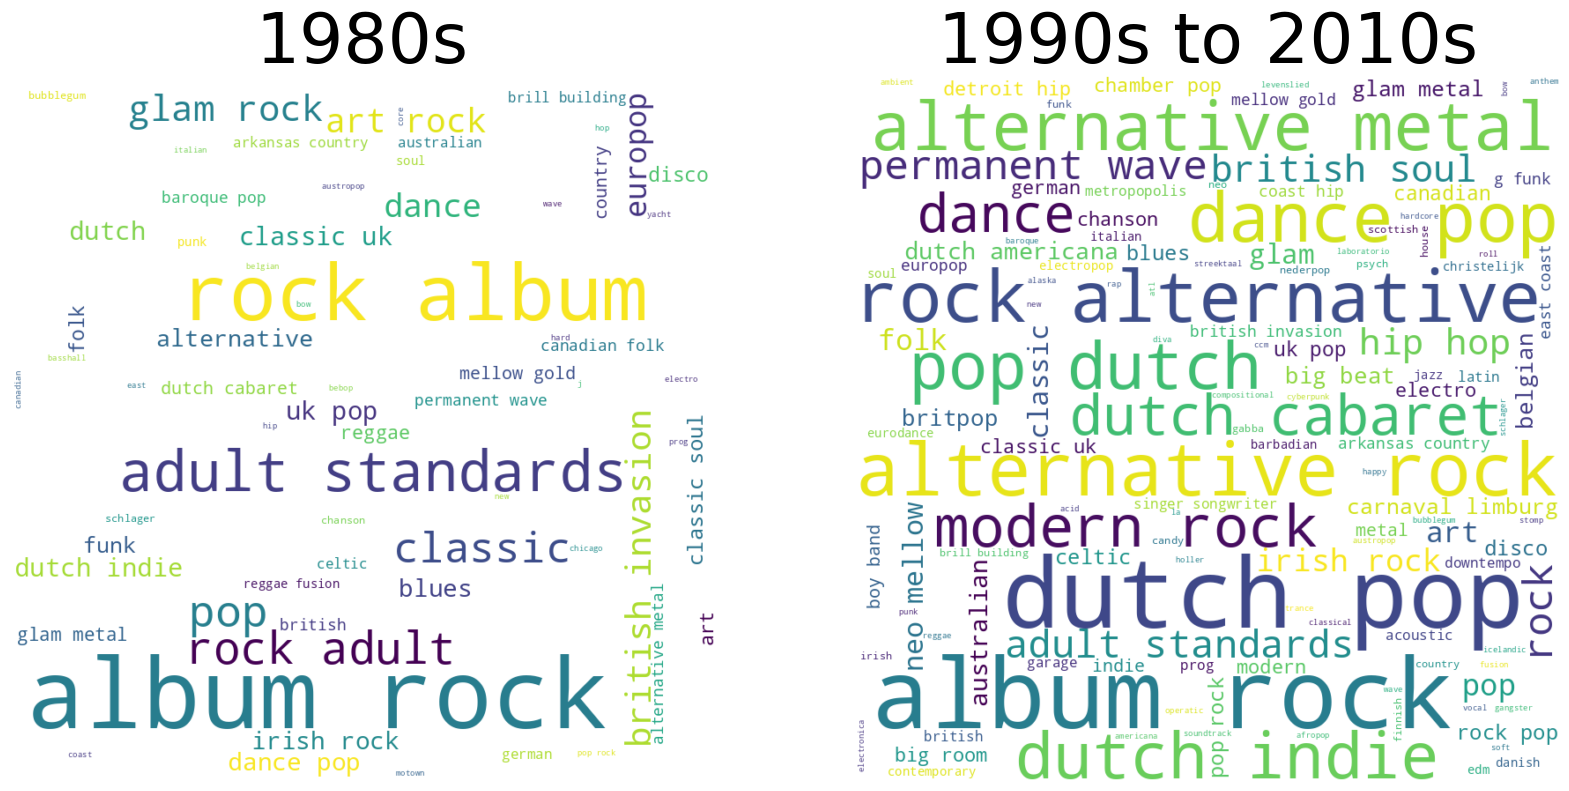

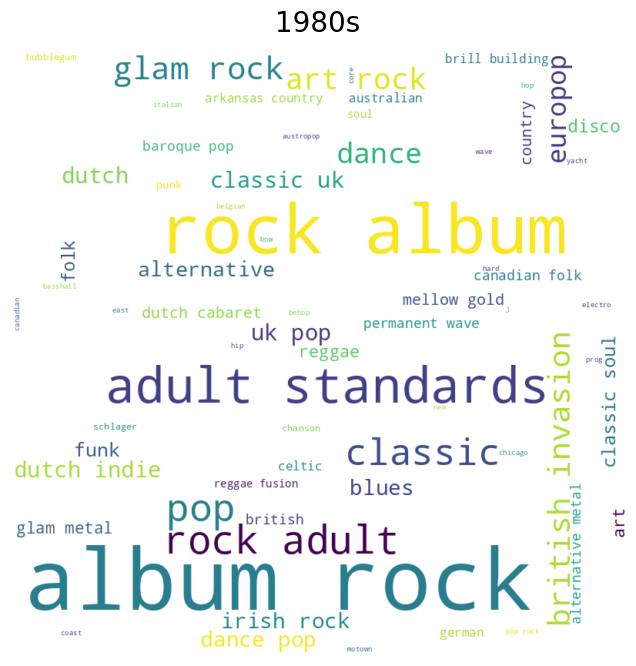

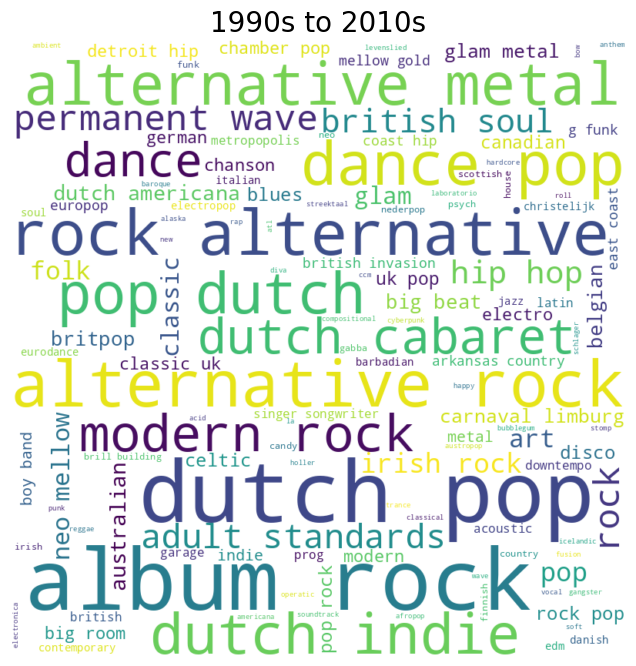

In [151]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
import io

path_dataset = "./dataset/Spotify-2000.csv"
df = pd.read_csv(path_dataset)
# filter data till 1980s
df_1980s = df[df['Year'] < 1990]
df_1990sto2010s =  df[(df['Year'] >= 1990)]
fig_35, ax = plt.subplots(1, 2, figsize=(20, 10))
wordcloud = WordCloud(width=800, height=800, background_color='white', random_state=21, max_font_size=110).generate(' '.join(df_1980s['Top Genre']))
ax[0].imshow(wordcloud, interpolation="bilinear")
ax[0].set_title('1980s', fontsize=50)  # Increase the fontsize to 20
ax[0].axis('off')
wordcloud = WordCloud(width=800, height=800, background_color='white', random_state=21, max_font_size=110).generate(' '.join(df_1990sto2010s['Top Genre']))
ax[1].imshow(wordcloud, interpolation="bilinear")
ax[1].set_title('1990s to 2010s', fontsize=50)  # Increase the fontsize to 20
ax[1].axis('off')
plt.show()

def generate_wordcloud_with_title(text, title):
    wordcloud = WordCloud(width=800, height=800, background_color='white', random_state=21, max_font_size=110).generate(text)
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)  # Add title to the plot
    plt.axis('off')
    
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    encoded_fig = base64.b64encode(buffer.read()).decode('utf-8')
    
    return encoded_fig


# Generate WordCloud for 1980s
# Generate WordCloud for 1980s
wordcloud_1980s = generate_wordcloud_with_title(' '.join(df_1980s['Top Genre']), '1980s')

# Generate WordCloud for 1990s to 2010s
wordcloud_1990s_to_2010s = generate_wordcloud_with_title(' '.join(df_1990sto2010s['Top Genre']), '1990s to 2010s')

In [152]:
# show it on map
# pd['val']=1 => MJ has more sales
# pd['val']=0 => TS has more sales
# new pd with country and val
static_compare_country_plot = pd.DataFrame(columns=['Country', 'Artist'])

# for same country, if MJ has more sales, val=1, else val=0
for index, row in static_country_plot_TS.iterrows():
    country = row['Country']
    sales_TS = row['Sales']
    sales_MJ = static_country_plot_MJ[static_country_plot_MJ['Country'] == country]['Sales'].values
    if len(sales_MJ) == 0:
        static_compare_country_plot = pd.concat([static_compare_country_plot, pd.DataFrame({'Country': [country], 'Artist': ['Taylor Swift']})])
        continue
    sales_MJ = sales_MJ[0]
    if sales_MJ > sales_TS:
        static_compare_country_plot = pd.concat([static_compare_country_plot, pd.DataFrame({'Country': [country], 'Artist': ['Michael Jackson']})])
    else:
        static_compare_country_plot = pd.concat([static_compare_country_plot, pd.DataFrame({'Country': [country], 'Artist': ['Taylor Swift']})])

for index, row in static_country_plot_MJ.iterrows():
    country = row['Country']
    sales_MJ = row['Sales']
    sales_TS = static_country_plot_TS[static_country_plot_TS['Country'] == country]['Sales'].values
    if len(sales_TS) == 0:
        static_compare_country_plot = pd.concat([static_compare_country_plot, pd.DataFrame({'Country': [country], 'Artist': ['Michael Jackson']})])
        continue
# Create the world map plot using Plotly
fig_36 = px.choropleth(static_compare_country_plot, 
                    locations="Country", 
                    locationmode="country names", 
                    color="Artist", 
                    range_color=['Taylor Swift', 'Michael Jackson'],
                    title="Country with More Sales of Michael Jackson Albums than Taylor Swift Albums"
                   )
fig_36.update_layout(
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)

fig_36.show()

In [153]:
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Read the CSV file
concert_data = pd.read_csv('dataset/Taylor_Train.csv', encoding='latin-1')

# # Display the first few rows to understand the structure of the data
# print(concert_data.head())

# # Check for missing values
# print(concert_data.isnull().sum())

# Clean the 'Revenue' column by removing non-numeric characters and converting to numeric type
concert_data['Revenue'] = concert_data['Revenue'].str.replace('$', '').str.replace(',', '').str.replace('\x97', '')

# Replace empty strings with NaN values
concert_data['Revenue'] = concert_data['Revenue'].replace('', np.nan)

# Convert the 'Revenue' column to float
concert_data['Revenue'] = concert_data['Revenue'].astype(float)

# Check the data types of columns
# print(concert_data.dtypes)


# Drop rows with missing values
concert_data.dropna(inplace=True)

# Step 3: Define data for the globe visualization using choropleth trace
data = go.Choropleth(
    locations=concert_data['Country'],  # Country names
    z=concert_data['Revenue'],  # Values to be color-mapped
    locationmode='country names',  # Define location mode as country names
    colorscale='Viridis',  # Color scale
    colorbar=dict(title='Revenue'),  # Color bar title
    marker_line_color='white'  # Marker line color
)

# Step 4: Define layout for the globe visualization
layout = go.Layout(
    title="Taylor Swift's Concert Revenue by Country on Globe",  # Title of the plot
    geo=dict(
        showframe=False,  # Hide frame
        showcoastlines=False,  # Hide coastlines
        projection_type='orthographic'  # Orthographic projection for a globe
    )
)

# Step 5: Create figure
fig_37 = go.Figure(data=data, layout=layout)
fig_37.update_layout(
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)
# Step 6: Show the plot
fig_37.show()

In [154]:
#fig 38
mj_data = pd.read_csv('./dataset/Michael_Jackson_Concerts.csv', encoding='unicode_escape')
ts_data = pd.read_csv('./dataset/Taylor_Swift_concerts.csv', encoding='unicode_escape')

# Create initial plots for Michael Jackson
fig_mj = go.Figure()
for tour, data in mj_data.groupby('Tour'):
    trace = go.Choropleth(
        z=data['Attendance'],
        locations=data['Country'],
        locationmode='country names',
        colorscale='Viridis',
        reversescale=True,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_title='Attendees',
        name=f'MJ - {tour}',
        visible=(tour == mj_data['Tour'].iloc[0])
    )
    fig_mj.add_trace(trace)

# Create initial plots for Taylor Swift
# Remove non-numeric values from the 'Attendance' column
ts_data['Attendance'] = ts_data['Attendance'].str.replace(r'[^\d,]', '', regex=True)

# Replace commas and convert 'Attendance' column to numeric
ts_data['Attendance'] = ts_data['Attendance'].str.replace(',', '')
ts_data['Attendance'] = pd.to_numeric(ts_data['Attendance'], errors='coerce')

# Drop rows with NaN values in 'Attendance' column
ts_data = ts_data.dropna(subset=['Attendance'])

# Reset index
ts_data.reset_index(drop=True, inplace=True)
fig_ts = go.Figure()
for tour, data in ts_data.groupby('Tour'):
    trace = go.Choropleth(
        z=data['Attendance'],
        locations=data['Country'],
        locationmode='country names',
        colorscale='Viridis',
        reversescale=True,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_title='Attendees',
        name=f'TS - {tour}',
        visible=(tour == ts_data['Tour'].iloc[0])
    )
    fig_ts.add_trace(trace)

# Create buttons for Michael Jackson
buttons_mj = []
for tour in mj_data['Tour'].unique():
    button = dict(
        label=f'MJ - {tour}',
        method='update',
        args=[{'visible': [tour == t for t in mj_data['Tour'].unique()]}, {'title': f'MJ - {tour}'}],
        args2=[{'visible': [tour == t for t in mj_data['Tour'].unique()]}, {'title': f'MJ - {tour}'}],
    )
    buttons_mj.append(button)

# Create buttons for Taylor Swift
buttons_ts = []
for tour in ts_data['Tour'].unique():
    button = dict(
        label=f'TS - {tour}',
        method='update',
        args=[{'visible': [tour == t for t in ts_data['Tour'].unique()]}, {'title': f'TS - {tour}'}],
        args2=[{'visible': [tour == t for t in ts_data['Tour'].unique()]}, {'title': f'TS - {tour}'}],
    )
    buttons_ts.append(button)

# Update layout for Michael Jackson plot
fig_mj.update_layout(
    title='Michael Jackson',
    updatemenus=[{'buttons': buttons_mj}]
)

# Update layout for Taylor Swift plot
fig_ts.update_layout(
    title='Taylor Swift',
    updatemenus=[{'buttons': buttons_ts}]
)

fig_mj.show()
fig_ts.show()

In [155]:
#application integration
from dash import Dash, dcc, html, Input, Output, dash_table
from collections import Counter
import base64

In [156]:

external_stylesheets = [
    'https://codepen.io/chriddyp/pen/bWLwgP.css',
    {
        'href': 'https://stackpath.bootstrapcdn.com/bootstrap/4.1.3/css/bootstrap.min.css',
        'rel': 'stylesheet',
        'integrity': 'sha384-MCw98/SFnGE8fJT3GXwEOngsV7Zt27NXFoaoApmYm81iuXoPkFOJwJ8ERdknLPMO',
        'crossorigin': 'anonymous'
    }
]

with open("./assets/bg5.gif", "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode()

with open("./assets/ts_mj.png", "rb") as image_file:
    encoded_image2 = base64.b64encode(image_file.read()).decode()

In [168]:
app = Dash(__name__,external_stylesheets =external_stylesheets)
styles = {
    'dropdown': {
        'width': '420px',
       ' padding-left':'20px',
        'display': 'inline-block',
        'font-size': '15px','border-color': '#D3C0F9','border-width': '2px',
        
    },
    'container': {
        'display': 'flex',
        'width': '420px',
        ' margin-left':'20px',
    }
}
app.layout = html.Div([
    html.Div(
        [   
            html.H1("Music Evolution Visual Analytics System", style={"text-align": "center", "font-family": "Segoe Script", 'font-size': '50px'}), ],
        style={ "background-image": "url('/assets/bg7.webp')", "background-position": "center", "color": "white", "padding-down":"0px", "border-radius": "10px", "box-shadow": "0 4px 6px rgba(0,0,0,0.1)", "margin": "20px auto"  }
    ),
    html.Div([
        html.Img(src=f"data:image/jpg;base64,{encoded_image}", style={"height": "auto", "width":"50%","display": "block", "margin": "auto"}),
    ], style={"background-color": "#D3C0F9", "padding": "10px"}
    ),
    html.Div([
        html.Div([
            dcc.Dropdown(
                id="demo-dropdown",
                options=[
                    {"label": "Global Music General Info", "value": "general_info"},
                    {"label": "Music: Past vs Present", "value": "past_present"},
                    {"label": "Case Studies", "value": "case_study"},
                    {"label": "Spotify", "value": "spotify"}
                ],
                value="",
                placeholder="Select the Desired Visualization",
                style={'width': '100%', "font-size": "20px", "font-family": "Segoe Script", 'border-color': '#6C3483','border-width': '2px',"color": "purple",}
            ),
        ], style={'width': '50%', 'margin': 'auto'}),
    ], style={"padding": "10px"}),
    html.Div(id='dd-output-container'),
    
], style={"background-color": "#D3C0F9", "padding": "10px"})


@app.callback(
    Output('dd-output-container', 'children'),
    Input('demo-dropdown', 'value')
)
def update_output(value):
    if value == 'general_info':
        return html.Div(
            children=[
                html.Div(children=[
                            dcc.Dropdown(
                                id='choro-dropdown',
                                options = [
                                    {'label': 'Pop', 'value': 'Pop'},
                                    {'label': 'EDM', 'value': 'EDM'},
                                    {'label': 'Rock/Metal', 'value': 'Rock/Metal'},
                                    {'label': 'Hip hop/Rap/R&b', 'value': 'Hip hop/Rap/R&b'}
                                ],
                                value='Pop',
                                 placeholder="Select a Genre to see Popularity",
                                style={'width':'350px',"margin-top": "20px", 'margin-bottom': '5px','padding-left': '0px','font-size': '15px','border-color': '#6C3483','border-width': '2px',"color": "purple","font-family": "Segoe Script" }
                            ),
                            dcc.Graph(id="fig_genre", figure=fig1_pop,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),
                        ]),
                
                dcc.Graph(id='top_albums_genres', figure=fig5_genre_list,style={"margin-bottom": "10px",'border': '3px solid #6C3483'}),

                dcc.Graph(id='=grammy_world',figure=fig_6,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),

                dcc.Graph(id='grammy_usa',figure=fig_7,style={"margin-bottom": "10px",'border': '3px solid #6C3483'}),
                
                dcc.Graph(id='money_makers', figure=fig_10, style={"margin-bottom": "10px",'border': '3px solid #6C3483'})

        ],style={'background-color': '#D3C0F9'})
    


    elif value == 'past_present':
        return html.Div(
    
            children=[
                dcc.Graph(id='revenue_physical',figure=fig_8,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),
                dcc.Graph(id='revenue_digital',figure=fig_9,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),
                dcc.Graph(id='spotify_users',figure=fig_24,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),
                dcc.Graph(id='richest_line', figure=fig_11, style={"margin-bottom": "10px","margin-right": "5px", "width": "100%",'border': '3px solid #6C3483'}),
               
                html.Div(
                            children=[
                                dcc.Graph(id='richest_boxt', figure=fig12_box, style={"margin-bottom": "10px","margin-left": "5px", "width": "49%",'border': '3px solid #6C3483'}),
                                dcc.Graph(id='richest_box_out_rem', figure=fig12b_box, style={"margin-bottom": "10px","margin-right": "5px", "width": "49%",'border': '3px solid #6C3483'}),
                            ],
                            style={"display": "flex", "flex-direction": "row", "justify-content": "space-between", "width": "100%",},
                ),
                dcc.Graph(id='genre_pie',figure=fig_13,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),
                html.Div([
                    html.Img(src='data:image/png;base64,{}'.format(wordcloud_1980s), style={'width': '50%', 'display': 'inline-block'}),
                    html.Img(src='data:image/png;base64,{}'.format(wordcloud_1990s_to_2010s), style={'width': '50%', 'display': 'inline-block'})
                ], style={'padding-down':'10px'}),
                dcc.Graph(id='top_artist_treemap_old',figure=fig_14,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),
                dcc.Graph(id='top_artist_treemap_new',figure=fig_14b,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),
                dcc.Graph(id='avg_songs_duration',figure=fig_34,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),
                dcc.Graph(id='avg_album_duration',figure=fig_15,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),
                dcc.Graph(id='corr_sales_dur',figure=fig_16,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),
            ],style={'background-color': '#D3C0F9'},         
        )
    
    elif value == 'case_study':
        return html.Div(
            children=[
                html.Div([
                    html.Img(src=f"data:image/jpg;base64,{encoded_image2}", style={"height": "auto", "width":"50%","display": "block", "margin": "auto"}),
                    ], style={"background-color": "#D3C0F9", "padding": "10px"}
            ),
                dcc.Graph(id='ts_countrywise_sales',figure=fig_20,style={"margin-bottom": "10px",'border': '3px solid #6C3483'}),
                dcc.Graph(id='ts_india_sales',figure=fig_21,style={"margin-bottom": "10px",'border': '3px solid #6C3483'}),
                dcc.Graph(id='mj_total_sales',figure=fig_22,style={"margin-bottom": "10px",'border': '3px solid #6C3483'}),
                dcc.Graph(id='ts_mj_sales',figure=fig_23,style={"margin-bottom": "10px",'border': '3px solid #6C3483'}),
                dcc.Graph(id='ts_mj_sales_cmp',figure=fig_36,style={"margin-bottom": "10px",'border': '3px solid #6C3483'}),
                dcc.Graph(id='ts_concert_globe',figure=fig_37,style={"margin-bottom": "10px",'border': '3px solid #6C3483'}),
                dcc.Graph(id='ts_mm_concert1',figure=fig_ts,style={"margin-bottom": "10px",'border': '3px solid #6C3483'}),
                dcc.Graph(id='ts_mm_concert1',figure=fig_mj,style={"margin-bottom": "10px",'border': '3px solid #6C3483'}),


            ],
            style={'background-color': '#D3C0F9'},

        )
    elif value == 'spotify':
        return html.Div(
            children=[
                dcc.Graph(id='spotify_users_bar',figure=fig_25,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),
                dcc.Graph(id='cntrywise_spotify_users',figure=fig_26,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),

                html.Div(children=[
                            dcc.Dropdown(
                                id='genrepop-dropdown',
                                options = spotify_genres,
                                value='All Genres',
                                placeholder="Select Genre to see Popularity Distribution",
                                style={'width':'450px',"margin-top": "20px", 'margin-bottom': '5px','padding-left': '0px','font-size': '15px','border-color': '#6C3483','border-width': '2px' }
                            ),
                        ]),
                dcc.Graph(id="genre_pop", figure=fig_17,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),
                html.Div(children=[
                            dcc.Dropdown(
                                id='genrechrctrstcs-dropdown',
                                options = spotify_genres,
                                value='All Genres',
                                placeholder="Select Genre to see KDE Distribution of Various Song Characteristics",
                                style={'width':'450px',"margin-top": "20px", 'margin-bottom': '5px','padding-left': '0px','font-size': '15px','border-color': '#6C3483','border-width': '2px' }
                            ),
                        ]),
                dcc.Graph(id="genre_chrctrstcs", figure=fig_18,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),
                dcc.Graph(id='song_chrctrstcs_corr',figure=fig_28,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),
                dcc.Graph(id='top_artsts_sngs_popularity',figure=fig_33,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),
                dcc.Graph(id='top_15_artsts_spotify',figure=fig_27,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),
                dcc.Graph(id='percnt_artists_cntry_spotify',figure=fig_29,style={"margin-bottom": "10px",'border': '3px solid #6C3483',}),
                html.Div(children=[
                    dcc.Dropdown(
                        id='country-dropdown',
                        options=[{'label': country, 'value': country} for country in top_artists_per_country['Country'].unique()],
                        value='Albania',  # Default value
                        clearable=False,
                        style={'width':'350px',"margin-top": "20px", 'margin-bottom': '5px','padding-left': '0px','font-size': '15px','border-color': '#6C3483','border-width': '2px',"color": "purple","font-family": "Segoe Script" }
                    ),
                    dcc.Graph(id='pie-chart'),
                    dash_table.DataTable(
                    id='artist-table',
                    columns=[
                        {'name': 'Name', 'id': 'Name'},
                        {'name': 'Gender', 'id': 'Gender'},
                        {'name': 'Age', 'id': 'Age'},
                        {'name': 'Genres', 'id': 'Genres'},
                        {'name': 'Popularity', 'id': 'Popularity'},
                        {'name': 'Followers', 'id': 'Followers'}
                    ],
                    data=[],  # Empty at initialization
                    style_table={'height': 'auto', 'overflowY': 'auto', 'border': '2px solid purple'},  # Purple border
                    style_header={'font-family': "Segoe Script", 'font-weight': 'bold','font-size': '20px', 'color': 'purple'},  # Bold and purple headers
                    style_cell={'font-family': 'Arial','font-size': '15px', 'color': 'purple'},  # Purple text
                    )
                ]),
            html.Div(children=[
                html.H2("Interactive K-Means Clustering with Song Playlists", style={"color": "purple","font-family": "Segoe Script", 'padding-up':'20px'}),
                html.Div([
                    dcc.Dropdown(
                        id='x-axis',
                        options=[{'label': i, 'value': i} for i in df_scaled.columns if i not in ['Title', 'Top Genre']],
                        value='Energy',
                        style={'width':'40%','margin-bottom': '5px','padding-left': '0px','font-size': '15px','border-color': '#6C3483','border-width': '2px',"color": "purple","font-family": "Segoe Script" }
                    ),
                    dcc.Dropdown(
                        id='y-axis',
                        options=[{'label': i, 'value': i} for i in df_scaled.columns if i not in ['Title', 'Top Genre']],
                        value='Danceability',
                        style={'width':'40%', 'margin-bottom': '5px','padding-left': '0px','font-size': '15px','border-color': '#6C3483','border-width': '2px',"color": "purple","font-family": "Segoe Script" }
                    ),
                    dcc.Dropdown(
                        id='z-axis',
                        options=[{'label': i, 'value': i} for i in df_scaled.columns if i not in ['Title', 'Top Genre']],
                        value='Valence',
                        style={'width':'40%', 'margin-bottom': '5px','padding-left': '0px','font-size': '15px','border-color': '#6C3483','border-width': '2px',"color": "purple","font-family": "Segoe Script" }
                    ),
                    dcc.Input(
                        id='num-clusters',
                        type='number',
                        value=3,
                        min=1,
                        max=10,
                        step=1,
                        style={'width': '10%'}
                    )
                ], style={'display': 'flex', 'justifyContent': 'space-around'}),
                dcc.Graph(id='cluster-graph'),
                html.Div(id='playlists-container')
            ])
            ],style={'background-color': '#D3C0F9'}
    )

    else:
        return html.Div(children=[],
            style={ "background-color":"#D3C0F9", 'height':'200px'})
    

#chloropleth genre dropdown update
curr_fig_genre=fig1_pop
@app.callback(Output('fig_genre', 'figure'),
[Input('choro-dropdown', 'value')])
def update_choro(value):
    global fig1_pop
    global fig2_edm
    global fig3_rock
    global fig4_hiphop
    global curr_fig_genre
    if value == 'Pop':
        curr_fig_genre=fig1_pop
        return fig1_pop
    elif value == 'EDM':
        curr_fig_genre=fig2_edm
        return fig2_edm
    elif value == 'Rock/Metal':
        curr_fig_genre=fig3_rock
        return fig3_rock
    elif value == 'Hip hop/Rap/R&b':
        curr_fig_genre=fig4_hiphop
        return fig4_hiphop
    else:
        return curr_fig_genre
    

#genre_popularity_spotify_kde_plot
curr_genre_pop=fig_17
@app.callback(Output('genre_pop', 'figure'),
[Input('genrepop-dropdown', 'value')])
def update_genre_pop(value):
    global curr_genre_pop
    if value:
        return pop_by_genre(value)
    else:
        return curr_genre_pop
    

#kde plot of characteristics of songs genre-wise
curr_genre_chrctrstcs=fig_18
@app.callback(Output('genre_chrctrstcs', 'figure'),
[Input('genrechrctrstcs-dropdown', 'value')])
def update_genre_chrctrstcs(value):
    global curr_genre_chrctrstcs
    if value:
        return chrctrstcs_by_genre(value)
    else:
        return curr_genre_chrctrstcs
    

@app.callback(
    [Output('pie-chart', 'figure'),
     Output('artist-table', 'data')],
    [Input('country-dropdown', 'value')]
)
def update_visuals(selected_country):
    # Update the pie chart
    genre_count = Counter(country_genres[selected_country])
    df_genres = pd.DataFrame(list(genre_count.items()), columns=['Genre', 'Count'])
    df_genres = df_genres.sort_values('Count', ascending=False)
    df_genres = df_genres.head(7)
    pie_chart = go.Figure(data=[go.Pie(labels=df_genres['Genre'], values=df_genres['Count'])])
    pie_chart.update_layout(title=f'Popular Genres in {selected_country}')

    # Update the artist table
    df_artists = top_artists_per_country[top_artists_per_country['Country'] == selected_country]
    artist_data = df_artists.to_dict('records')

    return pie_chart, artist_data


# Callback to update graph and display playlists and radar charts
# Callback to update graph and display playlists and radar charts
@app.callback(
    [Output('cluster-graph', 'figure'),
     Output('playlists-container', 'children')],
    [Input('x-axis', 'value'),
     Input('y-axis', 'value'),
     Input('z-axis', 'value'),
     Input('num-clusters', 'value')]
)
def update_graph_and_playlists(x_col, y_col, z_col, n_clusters):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    clusters = kmeans.fit_predict(df_scaled[[x_col, y_col, z_col]])
    df_scaled['cluster'] = clusters

    # Create a 3D scatter plot
    fig = px.scatter_3d(df_scaled, x=x_col, y=y_col, z=z_col, color='cluster',
                        title='K-means Clustering Visualization',
                        labels={x_col: x_col, y_col: y_col, z_col: z_col})

    # Define colors for playlists
    colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#FF69B4', '#6A5ACD', '#20B2AA', '#FF4500', '#DA70D6', '#BDB76B']
    colors = colors[:n_clusters]  # Limit the list of colors to the number of clusters

    # Prepare playlists and radar charts
    playlist_divs = []
    for i in range(n_clusters):
        cluster_data = df_scaled[df_scaled['cluster'] == i]
        mean_values = cluster_data[df_numeric.columns].mean().tolist()
        radar_chart = go.Figure(data=go.Scatterpolar(
            r=mean_values,
            theta=df_numeric.columns[1:], #remove columns index
            fill='toself'
        ))
        radar_chart.update_layout(
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[-3, 3]
                )
            ),
            showlegend=False
        )

        cluster_songs = cluster_data[['Title', 'Top Genre']].sample(n=5, random_state=1)
        songs_list = html.Ul([
            html.Li(f"{row['Title']} ({row['Top Genre']})", style={'color': colors[i]}) for idx, row in cluster_songs.iterrows()
        ])
        radar_html = dcc.Graph(figure=radar_chart, style={'width': '400px', 'height': '400px'})

        # Style the div
        playlist_div = html.Div([
            html.Div([html.H2(f'Playlist for Cluster {i + 1}', style={'color': colors[i]}), songs_list], style={'width': '50%', 'display': 'inline-block','font-size': '2em'}),
            html.Div([radar_html], style={'width': '50%', 'display': 'inline-block'})
        ], style={'background': '#f9f9f9', 'margin': '10px', 'padding': '10px', 'border-radius': '10px', 'box-shadow': '2px 2px 10px #aaa'})

        playlist_divs.append(playlist_div)

    return fig, playlist_divs



In [169]:
if __name__ == '__main__':
    app.run_server()

/tmp/ipykernel_741111/4028018951.py:23: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

